In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
data = pd.read_csv('Mall_Customers.csv')
print(data.head())

   CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [4]:
x = data.iloc[:,[3,4]].values

D:\anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:882: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  f"KMeans is known to have a memory leak on Windows "


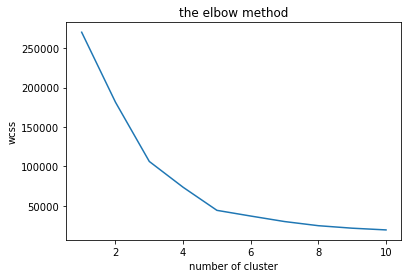

In [9]:
from sklearn.cluster import KMeans
wcss=[]

for i in range(1,11):
    kmeans= KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('the elbow method')
plt.xlabel('number of cluster')
plt.ylabel('wcss')
plt.show()


In [13]:
kmeans= KMeans(n_clusters=5,init='k-means++',random_state=42)
y_kmeans=kmeans.fit_predict(x)


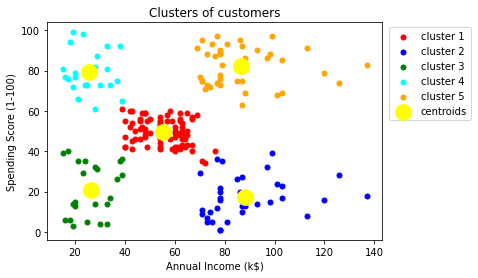

In [23]:
plt.scatter(x[y_kmeans==0,0],x[y_kmeans==0,1],color='red',s=25,label='cluster 1')
plt.scatter(x[y_kmeans==1,0],x[y_kmeans==1,1],color='blue',s=25,label='cluster 2')
plt.scatter(x[y_kmeans==2,0],x[y_kmeans==2,1],color='green',s=25,label='cluster 3')
plt.scatter(x[y_kmeans==3,0],x[y_kmeans==3,1],color='cyan',s=25,label='cluster 4')
plt.scatter(x[y_kmeans==4,0],x[y_kmeans==4,1],color='orange',s=25,label='cluster 5')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],color='yellow',s=250,label='centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(loc='upper right', bbox_to_anchor=(1.28,1))
plt.show()